In [1]:
from qaravan.core import * 
from qaravan.tensorQ import * 

In [2]:
def interp_ham(row_layout, sp, theta): 
    j = 1 
    jx = j * np.cos(theta)
    jy = jx
    jz = jx
    jc = j * np.sin(theta)
    return ChiralHeisenberg(row_layout, jx, jy, jz, jc, sp=sp)

def top_entropy(gstate, regions): 
    rdm_A = rdm_from_sv(gstate, regions[0])
    rdm_B = rdm_from_sv(gstate, regions[1])
    rdm_C = rdm_from_sv(gstate, regions[2])
    rdm_AB = rdm_from_sv(gstate, regions[0]+regions[1])
    rdm_BC = rdm_from_sv(gstate, regions[1]+regions[2])
    rdm_AC = rdm_from_sv(gstate, regions[0]+regions[2])
    rdm_ABC = rdm_from_sv(gstate, regions[0]+regions[1]+regions[2])

    sA = vN_entropy(rdm_A)
    sB = vN_entropy(rdm_B)
    sC = vN_entropy(rdm_C)
    sAB = vN_entropy(rdm_AB)
    sBC = vN_entropy(rdm_BC)
    sAC = vN_entropy(rdm_AC)
    sABC = vN_entropy(rdm_ABC)
    return np.real(sA + sB + sC - sAB - sBC - sAC + sABC)

# TEE is non-zero for 1D models

In [4]:
ham = XY(8)
_, gstate = ham.ground()

A = [0,1]
B = [2,3,4]
C = [5,6]
regions = [A, B, C]
print(top_entropy(gstate, regions))

0.029132153208173528


# Thin strip, periodic y

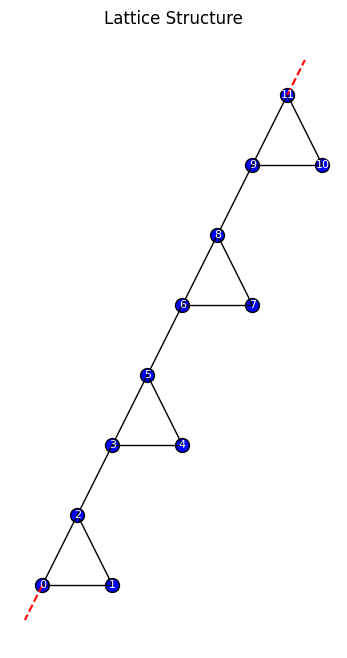

In [217]:
afm_ham = interp_ham(2, 8, 0)
half_ham = interp_ham(2, 8, 0.35 * np.pi)
csl_ham = interp_ham(2, 8, np.pi/2)

csl_ham.lattice.plot()

In [218]:
energy_a, gstate_a = afm_ham.ground()
energy_h, gstate_h = half_ham.ground()
energy_c, gstate_c = csl_ham.ground()

In [219]:
A = [0,1,2]
B = [3,4,5]
C = [6,7,8]

tee_a = top_entropy(gstate_a, [A,B,C])
tee_h = top_entropy(gstate_h, [A,B,C])
tee_c = top_entropy(gstate_c, [A,B,C])

print("At theta = 0, topological entropy = ", tee_a, " and quantum dimensions is ", np.exp(-tee_a))
print("At theta = 0.35 pi, topological entropy = ", tee_h, " and quantum dimensions is ", np.exp(-tee_h))
print("At theta = pi/2, topological entropy = ", tee_c, " and quantum dimensions is ", np.exp(-tee_c))

At theta = 0, topological entropy =  -0.11847910900454695  and quantum dimensions is  1.1257833551213658
At theta = 0.35 pi, topological entropy =  -7.55045678694638e-05  and quantum dimensions is  1.0000755074184111
At theta = pi/2, topological entropy =  1.864158181722055e-15  and quantum dimensions is  0.9999999999999981


# 2D lattice 

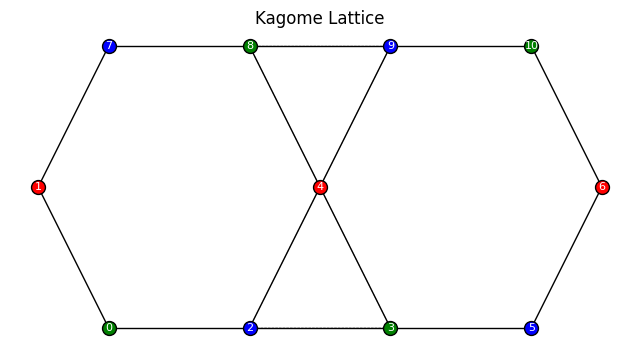

In [3]:
row_layout = [{'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': 0.5}]
sp = [0,7,11,14]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)
ham.lattice.plot()

In [5]:
ge, gs = ham.ground()

In [6]:
ge

array([-2.51160724])

In [17]:
len(ham.lattice.nn_pairs)

14

In [14]:
ham.lattice.triangle_terms

{(2, 3, 4), (4, 9, 8)}

In [16]:
ham.terms[40]

(np.float64(0.4539904997395468), (4, 8), ['z', 'z'])

In [18]:
len(ham.terms), 14*3 + 12

(54, 54)

In [5]:
ge 

array([-12.15657315])

In [4]:
energy_a, gstate_a = afm_ham.ground()
energy_h, gstate_h = half_ham.ground()
energy_c, gstate_c = csl_ham.ground()

In [5]:
A = [0,1,2]
B = [3,4,5]
C = [6,7,8]

tee_a = top_entropy(gstate_a, [A,B,C])
tee_h = top_entropy(gstate_h, [A,B,C])
tee_c = top_entropy(gstate_c, [A,B,C])

print("At theta = 0, topological entropy = ", tee_a, " and quantum dimensions is ", np.exp(-tee_a))
print("At theta = 0.35 pi, topological entropy = ", tee_h, " and quantum dimensions is ", np.exp(-tee_h))
print("At theta = pi/2, topological entropy = ", tee_c, " and quantum dimensions is ", np.exp(-tee_c))

At theta = 0, topological entropy =  -0.13144561856915726  and quantum dimensions is  1.1404758853254675
At theta = 0.35 pi, topological entropy =  -0.5038964667736064  and quantum dimensions is  1.6551579904388816
At theta = pi/2, topological entropy =  -0.2930568616631657  and quantum dimensions is  1.3405190124051574
